In [1]:
from apts import *
import pandas as pd
%matplotlib inline  

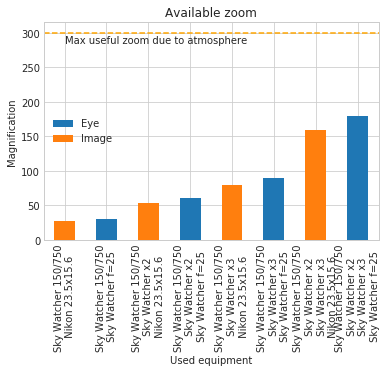

In [2]:
e = Equipment()

sky_watcher = "Sky Watcher"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
#e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

In [19]:
e.plot_fov()

TypeError: Empty 'DataFrame': no numeric data to plot

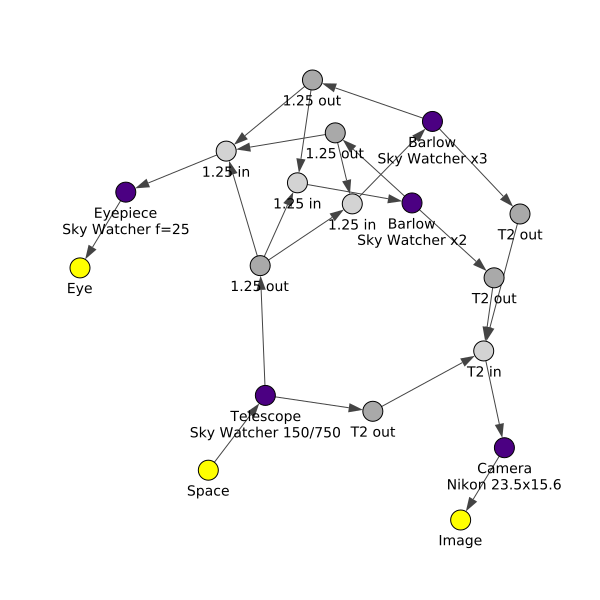

In [3]:
e.plot_connection_graph()

In [4]:
data = e.data()
data[data.Useful== True].sort_values(['Zoom'], ascending=[0])

,ID,Label,Type,Zoom,Useful,FoV,Exit pupil,Range,Brightness,Elements
2,2,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher x3, Sky Watcher f=25",Eye,180.000000,True,"0°23'20""",5.0 millimeter,12.880456,1.417234,4
4,4,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher x3, Nikon 23.5x15.6",Image,159.537359,True,"0°11'55""",0.0 millimeter,12.880456,1.804104,4
3,3,"Sky Watcher 150/750, Sky Watcher x3, Sky Watcher f=25",Eye,90.000000,True,"0°46'40""",5.0 millimeter,12.880456,5.668934,3
6,6,"Sky Watcher 150/750, Sky Watcher x3, Nikon 23.5x15.6",Image,79.768679,True,"0°23'50""",0.0 millimeter,12.880456,7.216417,3
1,1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.000000,True,"1°10'0""",5.0 millimeter,12.880456,12.755102,3
5,5,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.179120,True,"0°35'45""",0.0 millimeter,12.880456,16.236939,3
0,0,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.000000,True,"2°20'0""",5.0 millimeter,12.880456,51.020408,2
7,7,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.589560,True,"1°11'30""",0.0 millimeter,12.880456,64.947755,2


In [5]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [6]:
place.sunset_time()

datetime.datetime(2018, 4, 16, 19, 36, 36, 992531, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

In [7]:
place.get_weather()

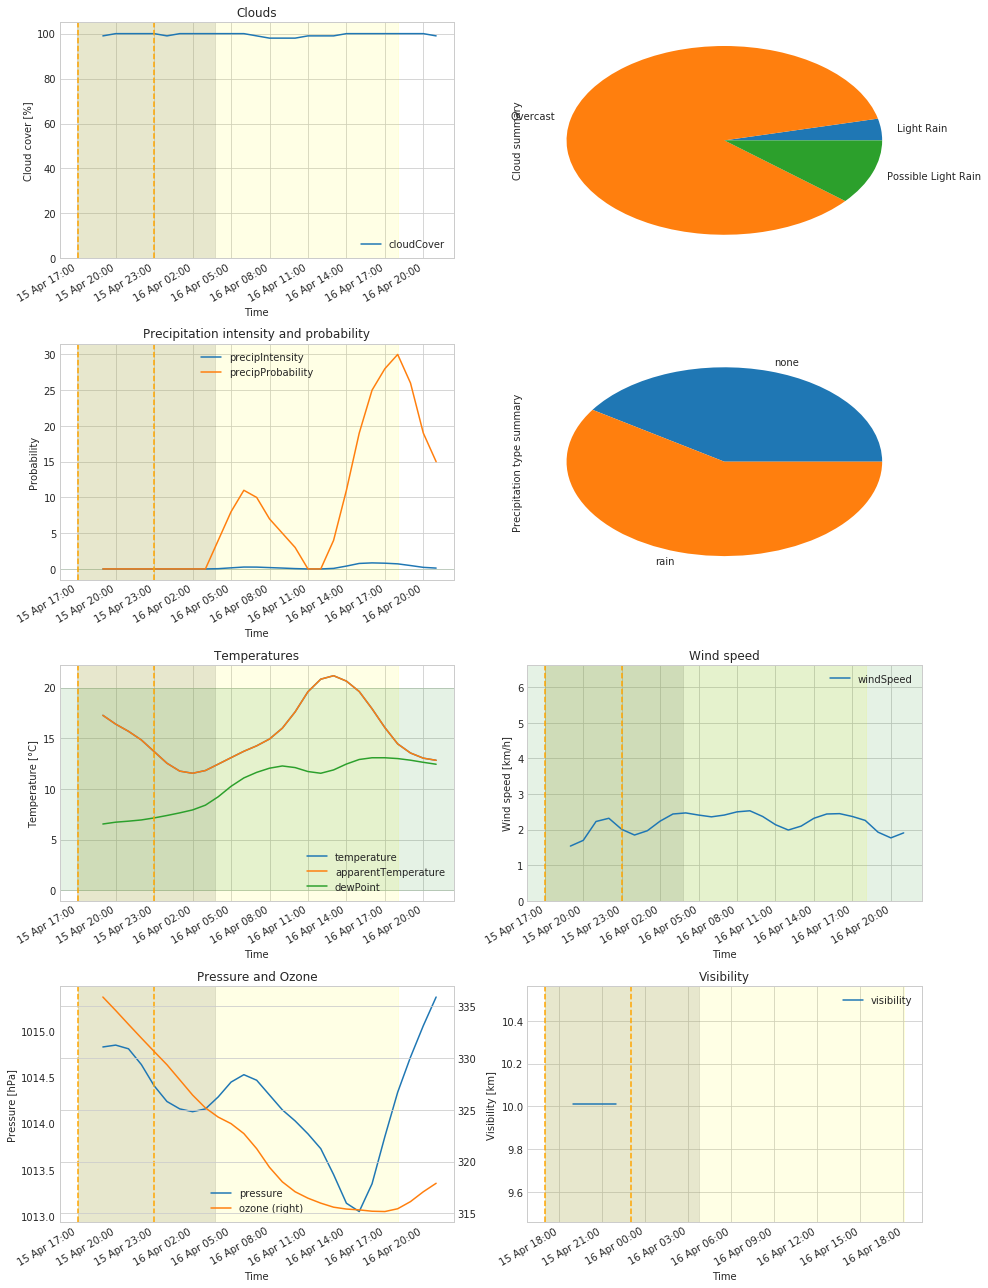

In [8]:
o.plot_weather()

In [9]:
o.weather_is_good()

False

In [10]:
o.place._moon_phase_letter()

'Z'

In [11]:
o.place.moon_phase()

98

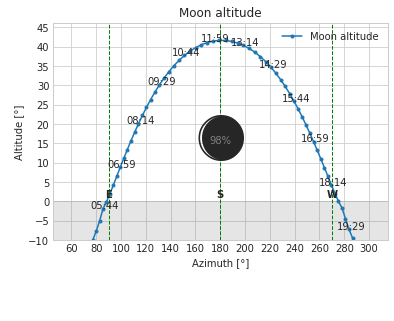

In [12]:
o.place.plot_moon_path()

In [13]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [14]:
o.local_planets.objects

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7fc1736374e0>",Mercury,2018-04-16 11:21:57.008079+02:00,41.022874,1.49,0.316418,1.168451,0.658378,20.086769
1,"<Venus ""Venus"" at 0x7fc173637668>",Venus,2018-04-16 14:12:33.544731+02:00,57.777636,-3.82,3.167686,17.931442,1.517704,91.516762
2,"<Mars ""Mars"" at 0x7fc1736377f0>",Mars,2018-04-16 06:14:16.413338+02:00,16.655519,-0.03,19.174436,-23.233669,0.971560,87.857849
3,"<ephem.Jupiter ""Jupiter"" at 0x7fc17379f8d0>",Jupiter,2018-04-16 02:20:33.036361+02:00,23.069386,-2.30,15.268389,-16.804034,4.488880,99.844559
4,"<ephem.Saturn ""Saturn"" at 0x7fc17379fa40>",Saturn,2018-04-16 05:43:26.296292+02:00,17.649045,0.43,18.659107,-22.236980,9.726934,99.772163
5,"<Uranus ""Uranus"" at 0x7fc173637978>",Uranus,2018-04-16 12:48:53.304169+02:00,50.248909,5.90,1.769357,10.399523,20.894136,99.999916
6,"<Neptune ""Neptune"" at 0x7fc173637b00>",Neptune,2018-04-16 10:11:00.614002+02:00,33.277508,7.95,23.130850,-6.582848,30.694761,99.987984


In [15]:
o.get_visible_planets()

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
108,M109,-,NGC 3992,Spiral Galaxy,Ursa Major,9.8,55000000,11.960000,53.383333,7.000,4.000,2018-04-15 23:03:32.247784+02:00,86.880935
97,M98,-,NGC 4192,Spiral Galaxy,Coma Berenices,10.1,60000000,12.230000,14.900000,9.500,3.200,2018-04-15 23:19:40.641213+02:00,54.646014
98,M99,-,NGC 4254,Spiral Galaxy,Coma Berenices,9.9,60000000,12.313333,14.416667,5.400,4.800,2018-04-15 23:24:39.713214+02:00,54.163028
105,M106,-,NGC 4258,Spiral Galaxy,Canes Venatici,8.4,25000000,12.316667,47.300000,19.000,8.000,2018-04-15 23:24:50.210528+02:00,87.037258
60,M61,-,NGC 4303,Spiral Galaxy,Virgo,9.7,60000000,12.365000,4.466667,6.000,5.500,2018-04-15 23:27:45.579031+02:00,44.217627
39,M40,-,Winecke 4,Double Star,Ursa Major,9.0,510,12.370000,58.083333,0.817,0.817,2018-04-15 23:28:00.405317+02:00,82.181785
99,M100,-,NGC 4321,Spiral Galaxy,Coma Berenices,9.3,60000000,12.381667,15.816667,7.000,6.000,2018-04-15 23:28:44.874801+02:00,55.562677
83,M84,-,NGC 4374,Lenticular (S0) Galaxy,Virgo,9.1,60000000,12.418333,12.883333,5.000,5.000,2018-04-15 23:30:56.603939+02:00,52.630572
84,M85,-,NGC 4382,Lenticular (S0) Galaxy,Coma Berenices,9.1,60000000,12.423333,18.183333,7.100,5.200,2018-04-15 23:31:14.273713+02:00,57.928624
85,M86,-,NGC 4406,Lenticular (S0) Galaxy,Virgo,8.9,60000000,12.436667,12.950000,7.500,5.500,2018-04-15 23:32:02.396238+02:00,52.697269


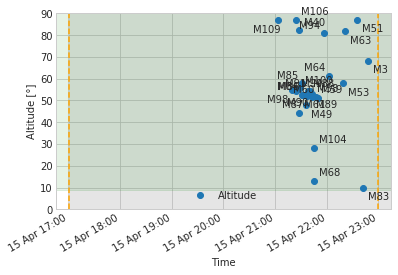

In [17]:
o.plot_messier()

In [18]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)